# Analiza oglasov za delo

Za projektno nalogo bom analizirala oglase za delo, ki so bili objavljeni na spletni strani [e-Študentski Servis](https://www.studentski-servis.com/studenti/prosta-dela).

In [1]:
import pandas as pd

In [2]:
oglasi = pd.read_csv("\obdelani-podatki\oglasi.csv", index_col="sifra")

In [3]:
oglasi

,vrsta_dela,lokacija,neto_placilo,trajanje,delovnik,prosta_mesta
sifra,,,,,,
288776,TRENER/KA,HRUŠICA,8.4,DLJE ČASA (OBČASNO),PO DOGOVORU,NaN
304105,DELO NA TERENU,POSAVJE,6.0,PO DOGOVORU,PO DOGOVORU,NaN
309918,DELO NA TERENU,"RIBNICA, KOČEVJE",6.0,PO DOGOVORU,PO DOGOVORU,NaN
309919,DELO NA TERENU,"ČRNOMELJ, METLIKA",6.0,PO DOGOVORU,PO DOGOVORU,NaN
317382,STREŽBA,CERKLJE NA GORENJSKEM,7.0,DLJE ČASA (ZAČ. IN OBČ. DELO),MED VIKENDI,2.0
...,...,...,...,...,...,...
385366,POMOČ V KUHINJI,SORICA,7.0,PO DOGOVORU,PO DOGOVORU,NaN
385367,KLICNI CENTER,LJUBLJANA ŠIŠKA,6.7,DLJE ČASA (ZAČ. IN OBČ. DELO),IZMENSKO,2.0
385371,POMOČ PRI PRODAJI,LJUBLJANA - BTC,6.0,DLJE ČASA (ZAČ. IN OBČ. DELO),IZMENSKO,NaN


## Plačilo

Oglasi so razvrščeni kronološko, kot so jih objavljali na spletno stran. Poglejmo si razvrstitev po padajoči urni postavki.

In [4]:
padajoce_placilo = oglasi.sort_values("neto_placilo", ascending=False)

In [5]:
padajoce_placilo

,vrsta_dela,lokacija,neto_placilo,trajanje,delovnik,prosta_mesta
sifra,,,,,,
385238,POUČEVANJE,DOMŽALE,10.1,DLJE ČASA (ZAČ. IN OBČ. DELO),POPOLDAN,2.0
380941,POUČEVANJE,ŽALEC,10.1,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,NaN
334621,POUČEVANJE,ŠKOFJA LOKA,10.1,DLJE ČASA (ZAČ. IN OBČ. DELO),PO DOGOVORU,NaN
378800,POUČEVANJE,LJUBLJANA,10.1,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,NaN
334622,POUČEVANJE,ŠKOFJA LOKA,10.1,PO DOGOVORU,PO DOGOVORU,NaN
...,...,...,...,...,...,...
383980,INVENTURA,CELJE,5.2,"TOREK, 8. 11. 2022",DOPOLDAN,20.0
384967,POMOČ PRI PRODAJI,CELJE,5.2,DLJE ČASA (ZAČ. IN OBČ. DELO),IZMENSKO,3.0
384510,ADMINISTRATIVNA DELA,LJUBLJANA,5.2,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,NaN


Katera dela so najbolje plačana?

In [6]:
padajoce_placilo.head(8)

,vrsta_dela,lokacija,neto_placilo,trajanje,delovnik,prosta_mesta
sifra,,,,,,
385238,POUČEVANJE,DOMŽALE,10.1,DLJE ČASA (ZAČ. IN OBČ. DELO),POPOLDAN,2.0
380941,POUČEVANJE,ŽALEC,10.1,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,NaN
334621,POUČEVANJE,ŠKOFJA LOKA,10.1,DLJE ČASA (ZAČ. IN OBČ. DELO),PO DOGOVORU,NaN
378800,POUČEVANJE,LJUBLJANA,10.1,DLJE ČASA (ZAČ. IN OBČ. DELO),DOPOLDAN,NaN
334622,POUČEVANJE,ŠKOFJA LOKA,10.1,PO DOGOVORU,PO DOGOVORU,NaN
379678,TRENER/KA,LJUBLJANA - DRAVLJE,10.1,PO DOGOVORU,POPOLDAN,2.0
381773,POUČEVANJE,KRANJ,10.1,DLJE ČASA (ZAČ. IN OBČ. DELO),PO DOGOVORU,NaN
362422,PROGRAMIRANJE,LJUBLJANA,10.0,PO DOGOVORU,PO DOGOVORU,2.0


Opazimo, da se med najbolje plačanimi deli največkrat pojavi poučevanje.

Poglejmo, ali je število ponudb za delo povezano z urno postavko.

<AxesSubplot: xlabel='neto_placilo'>

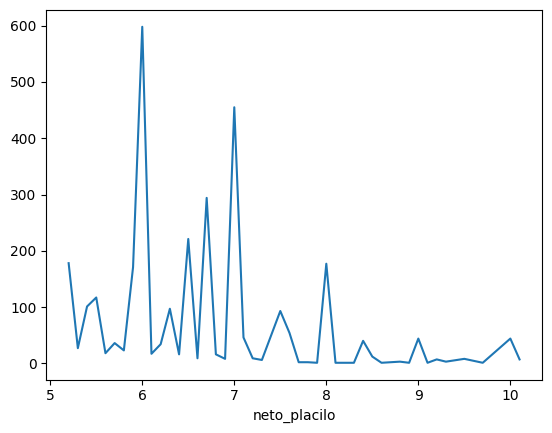

In [7]:
oglasi.groupby("neto_placilo").size().plot()

Vidimo, da največ oglasov ponuja neto urno postavko med 6 €/uro in 7 €/uro. Z višjo urno postavko število oglasov praviloma pada (više je le na okroglih vrednostih).
Vendar oglasi ponujajo različno število prostih mest, zato preverimo, če enako velja tudi za skupno število prostih mest pri vsaki urni postavki, torej da je tudi število prostih mest med 6 €/uro in 7 €/uro največje, potem pa začne padati.

<AxesSubplot: xlabel='neto_placilo'>

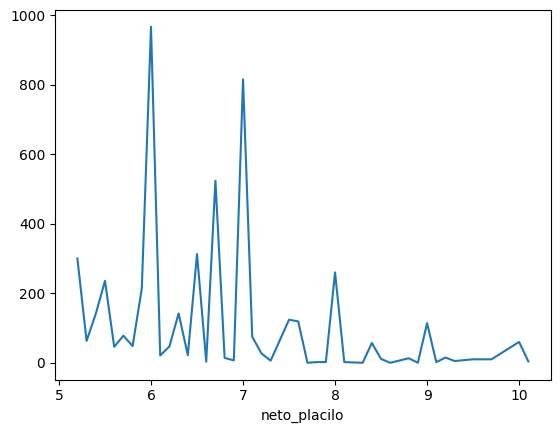

In [8]:
oglasi.groupby("neto_placilo").prosta_mesta.sum().plot()

Iz grafa je razvidno, da sklep velja tudi za število prostih mest.

In [9]:
zaokrozene_urne_postavke = oglasi["neto_placilo"].round()
oglasi["zaokrozene_urne_postavke"] = zaokrozene_urne_postavke
oglasi

,vrsta_dela,lokacija,neto_placilo,trajanje,delovnik,prosta_mesta,zaokrozene_urne_postavke
sifra,,,,,,,
288776,TRENER/KA,HRUŠICA,8.4,DLJE ČASA (OBČASNO),PO DOGOVORU,NaN,8.0
304105,DELO NA TERENU,POSAVJE,6.0,PO DOGOVORU,PO DOGOVORU,NaN,6.0
309918,DELO NA TERENU,"RIBNICA, KOČEVJE",6.0,PO DOGOVORU,PO DOGOVORU,NaN,6.0
309919,DELO NA TERENU,"ČRNOMELJ, METLIKA",6.0,PO DOGOVORU,PO DOGOVORU,NaN,6.0
317382,STREŽBA,CERKLJE NA GORENJSKEM,7.0,DLJE ČASA (ZAČ. IN OBČ. DELO),MED VIKENDI,2.0,7.0
...,...,...,...,...,...,...,...
385366,POMOČ V KUHINJI,SORICA,7.0,PO DOGOVORU,PO DOGOVORU,NaN,7.0
385367,KLICNI CENTER,LJUBLJANA ŠIŠKA,6.7,DLJE ČASA (ZAČ. IN OBČ. DELO),IZMENSKO,2.0,7.0
385371,POMOČ PRI PRODAJI,LJUBLJANA - BTC,6.0,DLJE ČASA (ZAČ. IN OBČ. DELO),IZMENSKO,NaN,6.0


Glede na zaokrožene urne postavke poglejmo, kje se, pri čim višji urni postavki, lahko zaposli največ ljudi skupaj.

In [10]:
oglasi.sort_values(by=['zaokrozene_urne_postavke', 'prosta_mesta'], ascending=[False, False]).head(10)

,vrsta_dela,lokacija,neto_placilo,trajanje,delovnik,prosta_mesta,zaokrozene_urne_postavke
sifra,,,,,,,
344663,POUČEVANJE,LJUBLJANA - IN DRUGI KRAJI PO SLOVENIJI,9.7,PO DOGOVORU,PO DOGOVORU,10.0,10.0
385076,FIZIČNA DELA,NOVO MESTO,9.5,7. -11. 11. 2022,DOPOLDAN,6.0,10.0
379485,STREŽBA,SEŽANA,10.0,"DLJE ČASA (ZAČ. IN OBČ. DELO), PO DOGOVORU",MED VIKENDI,5.0,10.0
383386,SVETOVALEC/KA,LJUBLJANA,10.0,DLJE ČASA (ZAČ. IN OBČ. DELO),PO DOGOVORU,4.0,10.0
385118,SVETOVALEC/KA,LJUBLJANA IN PO SLOVENIJI,10.0,DLJE ČASA (ZAČ. IN OBČ. DELO),PO DOGOVORU,4.0,10.0
360215,UČITELJ/ICA PLAVANJA,LJUBLJANA,10.0,DLJE ČASA (OBČASNO),PO DOGOVORU,3.0,10.0
379834,STREŽBA HRANE IN PIJAČE,LJUBLJANA,10.0,DLJE ČASA (ZAČ. IN OBČ. DELO),PO DOGOVORU,3.0,10.0
382244,TRENER/KA,LJUBLJANA,10.0,DLJE ČASA (ZAČ. IN OBČ. DELO),POPOLDAN,3.0,10.0
384587,POUČEVANJE,LJUBLJANA,10.0,DLJE ČASA (ZAČ. IN OBČ. DELO),PO DOGOVORU,3.0,10.0


## Delovnik

<AxesSubplot: xlabel='delovnik'>

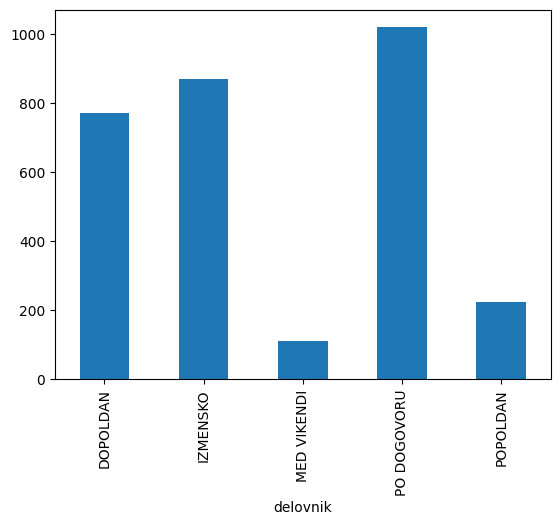

In [11]:
oglasi.groupby("delovnik").size().plot.bar()

Iz grafa je razvidno, da so dela, ki potekajo samo med vikendi, najmanj iskana, za največ del pa se za delovni čas dogovoriš z delodajalcem.

Kakšen delavnik imajo dela, katerih urna postavka je več kot 8 €/uro?

<AxesSubplot: xlabel='delovnik'>

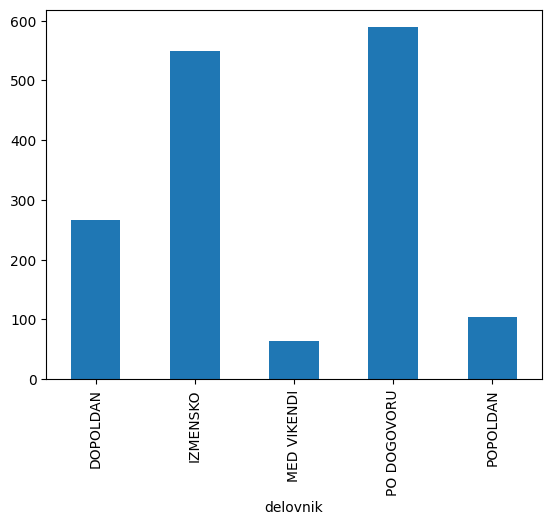

In [12]:
novi_oglasi = oglasi[oglasi["prosta_mesta"].notna()]

novi_oglasi[novi_oglasi.neto_placilo > 8]

novi_oglasi.groupby("delovnik").size().plot.bar()

Če primerjamo z grafom vseh del vidimo, da je manj ponudb za delo dopoldan, ostalo pa ostaja sorazmerno enako, kar je bilo pričakovano.

## Lokacija

<AxesSubplot: >

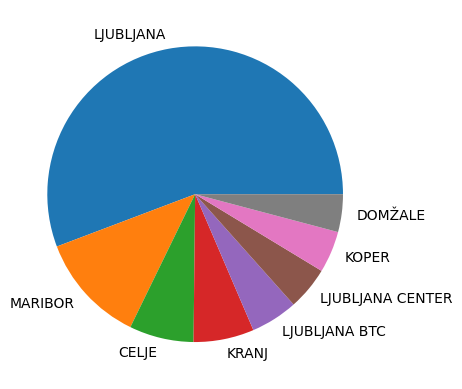

In [13]:
oglasi.groupby("lokacija").size().sort_values(ascending=False).head(8).plot.pie()

Kot pričakovano, je največ ponudb za delo v največjih krajih v Sloveniji - Ljubljani, Mariboru, Celju in Kranju.

Ali obstaja odvisnost urne postavke od lokacije dela?

In [14]:
oglasi.groupby("lokacija").neto_placilo.mean().sort_values(ascending=False).head(15)

lokacija
LJUBLJANA - DRAVLJE                        10.1
PTUJ, OD DOMA                              10.0
TURNIŠČE, LENDAVA                          10.0
KRANJ, DELO OD DOMA                        10.0
RIBNICA, SODRAŽICA                         10.0
DELO OD DOMA ALI V LJUBLJANI               10.0
TABOR, VELIKA PIREŠICA, ŠENTRUPERT         10.0
JEZERSKO                                   10.0
LJUBLJANA - IN DRUGI KRAJI PO SLOVENIJI     9.7
OD DOMA / LJUBLJANA ČRNUČE                  9.5
OD DOMA                                     9.3
LJUBLJANA Z OKOLICO OZ. PO SLOVENIJI        9.2
LJUBLJANA OD DOMA                           9.2
BOVEC                                       9.0
CELJE, VELENJE                              9.0
Name: neto_placilo, dtype: float64

In [15]:
oglasi.groupby("lokacija").neto_placilo.mean().sort_values(ascending=False).tail(15)

lokacija
SLOVENJSKE KONJICE            5.2
RADOMLJE, VOLČJI POTOK        5.2
SLIVNICA VZHOD                5.2
CERKVENJAK                    5.2
MIKLAVŽ                       5.2
KOPER / DELO OD DOMA          5.2
MEŽICA                        5.2
KOTREDEŽ                      5.2
KRANJ - LABORE                5.2
ŠKOFJA LOKA / DELO OD DOMA    5.2
LESKOVEC PRI KRŠKEM           5.2
GRADAC                        5.2
DEBELI RTIČ                   5.2
LJUBLJANA-RUDNIK              5.2
ZAGORJE OB SAVI, IZLAKE       5.2
Name: neto_placilo, dtype: float64

Ker se tako pri najvišjih kot pri najnižjih urnih postavkah pojavljajo različni kraji, sklepamo, da urna postavka in lokacija dela nista povezani.